In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ks_2samp


In [20]:
data = pd.read_csv('FAKEBILL_third_day.csv')
#dependent

y= data['is_genuine']
#independent
X = data[['height_left','height_right','margin_low','margin_up','length']] 


In [25]:
X

,height_left,height_right,margin_low,margin_up,length
0,104.86,104.95,4.52,2.89,112.83
1,103.36,103.66,3.77,2.99,113.09
2,104.48,103.50,4.40,2.94,113.16
3,103.91,103.94,3.62,3.01,113.51
4,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...
1495,104.38,104.17,4.42,3.09,111.28
1496,104.63,104.44,5.27,3.37,110.97
1497,104.01,104.12,5.51,3.36,111.95
1498,104.28,104.06,5.17,3.46,112.25


In [26]:
dfnew=data.drop('diagonal',axis=1)

In [27]:
dfnew

,is_genuine,height_left,height_right,margin_low,margin_up,length
0,True,104.86,104.95,4.52,2.89,112.83
1,True,103.36,103.66,3.77,2.99,113.09
2,True,104.48,103.50,4.40,2.94,113.16
3,True,103.91,103.94,3.62,3.01,113.51
4,True,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,False,104.38,104.17,4.42,3.09,111.28
1496,False,104.63,104.44,5.27,3.37,110.97
1497,False,104.01,104.12,5.51,3.36,111.95
1498,False,104.28,104.06,5.17,3.46,112.25


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Print the shapes of the datasets (optional)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Print the first few rows of the datasets (optional)
print("X_train head:\n", X_train.head())
print("X_test head:\n", X_test.head())
print("y_train head:\n", y_train.head())
print("y_test head:\n", y_test.head())


X_train shape: (1200, 5)
X_test shape: (300, 5)
y_train shape: (1200,)
y_test shape: (300,)
X_train head:
       height_left  height_right  margin_low  margin_up  length
382        104.62        103.80        4.08       3.08  113.26
538        104.50        103.49        4.08       2.82  113.50
1493       104.33        104.61        4.88       3.35  112.16
1112       104.28        104.31        5.61       3.27  111.61
324        104.42        103.60        4.18       2.89  113.32
X_test head:
       height_left  height_right  margin_low  margin_up  length
1116       103.90        104.12    4.990000       3.42  111.27
1368       104.32        104.38    5.650000       3.24  112.30
422        103.53        103.63    4.040000       2.96  112.76
413        103.66        103.50    4.485967       3.16  112.95
451        103.79        103.54    4.070000       2.78  113.03
y_train head:
 382      True
538      True
1493    False
1112    False
324      True
Name: is_genuine, dtype: bool
y_test h

In [13]:
# # Create a logistic regression model
# model = LogisticRegression()

# # Fit the model to the training data
# model.fit(X_train, y_train)


In [14]:
# # Make predictions on the test data
# y_pred = model.predict(X_test)


In [15]:

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Display a classification report
# report = classification_report(y_test, y_pred)
# print("Classification Report:\n", report)

# # Generate a confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)


In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_report_str)

Accuracy: 0.99
Confusion Matrix:
 [[107   3]
 [  0 190]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [31]:
model=sm.Logit(y_train,X_train)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.030303
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.9519
Time:                        09:44:53   Log-Likelihood:                -36.364
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                1.051e-310
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
height_left     -2.4800      1.059     -2.342      0.019      -4.555      -0.405
height_right    -2.8496      0.985     -2.894      0.004      -4.780      -0.920
margin_low      -5.4196      0.964     -5.624      0.000      -7.308      -3.531
margin_up       -9.1747      2.126     -4.315      0.000     -13.342      -5.007
length           5.4101      0.746      7.255      0.000       3.948       6.872
================================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [32]:
#Task 4

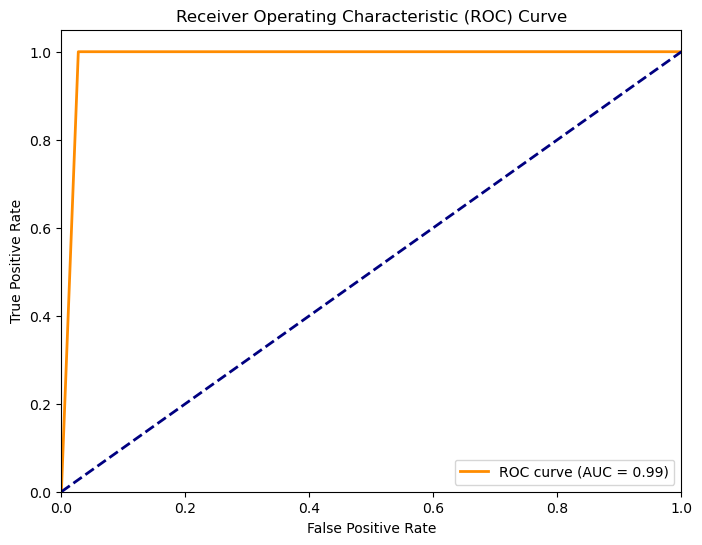

In [33]:

# # Generate a hypothetical dataset
# X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# # Split the data into a training and testing set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create and train a binary classification model (e.g., Random Forest)
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # Get predicted probabilities for the positive class
# y_scores = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [35]:
auc = roc_auc_score(y_test, y_pred)

In [36]:
auc

0.9863636363636364

In [43]:

ks_statistic, p_value = ks_2samp(y_pred,y_test)

print("KS Statistic:", ks_statistic)
print("P-value:", p_value)


KS Statistic: 0.01
P-value: 1.0
